In [1]:
from scipy import misc
import numpy as np
import skimage.data
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import selectivesearch

# [selectivesearch](https://github.com/AlpacaDB/selectivesearch)

In [2]:
img = misc.imread('../data/0001TP_006690.png') 

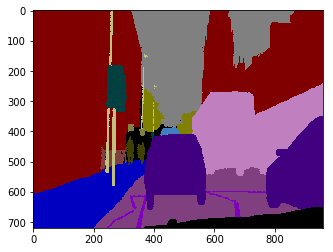

In [3]:
plt.imshow(img)

In [4]:
height, width = img.shape[:2]

In [5]:
height

720

In [6]:
width

960

In [7]:
img_r = img[:, :, 0::3]
img_g = img[:, :, 1::3]
img_b = img[:, :, 2::3]

In [8]:
np.unique(img_r)

array([  0,  64, 128, 192], dtype=uint8)

In [9]:
np.unique(img_g)

array([  0,  64, 128, 192], dtype=uint8)

In [10]:
np.unique(img_b)

array([  0,  64, 128, 192], dtype=uint8)

In [11]:
for row in range(height):
    for col in range(width):
        if np.array_equal(img[row, col, :], [64, 0, 128]):
#             print('汽车 Car = [64, 0, 128]')
            pass
        elif np.array_equal(img[row, col, :], [64, 64, 0]):
#             print('行人 Pedestrian = [64, 64, 0]')
            pass
        elif np.array_equal(img[row, col, :], [0, 128, 192]):
#             print('自行车手 Bicyclist = [0, 128, 192]')
            pass
        elif np.array_equal(img[row, col, :], [192, 128, 192]):
#             print('自行车手 Bicyclist = [192, 128, 192]')
            pass
        else:
            img[row, col, :] = [0, 0, 0]

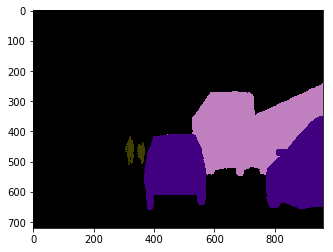

In [12]:
plt.imshow(img)

In [13]:
img_lbl, regions = selectivesearch.selective_search(img, scale=500, sigma=0.9, min_size=10)

In [14]:
candidates = set()
for r in regions:
    if r['rect'] in candidates:
        pass
        continue
    if r['size'] < 2000:
        pass
        continue
    x, y, w, h = r['rect']
    if h==0 or w==0:
        continue
    elif w / h > 1.2 or h / w > 1.2:
        pass
        continue
    candidates.add(r['rect'])

In [15]:
len(candidates)

19

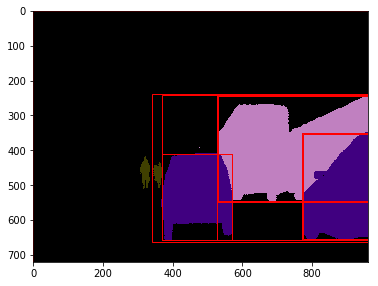

In [16]:
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(6, 6))
ax.imshow(img)
for x, y, w, h in candidates:
    rect = mpatches.Rectangle((x, y), w, h, fill=False, edgecolor='red', linewidth=1)
    ax.add_patch(rect)
plt.show()